In [136]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [137]:
counts = pd.read_csv("../data/expressao_genica.csv", index_col=0)  # genes nas linhas, amostras nas colunas
counts = counts.T
meta = pd.read_csv("../data/metadata.csv", index_col=0)  # precisa ter colunas: sample, condition

In [ ]:
# pequena gambiarra a seguir para tirar as amostras sem subtipo molecular (junta e separa dps)

counts['subtipo_molecular'] = meta.loc[counts.index, "paper_Molecular.Subtype"]
counts = counts.dropna(subset=['subtipo_molecular'])  # Remove linhas com NaN na coluna 'subtipo_molecular'

# separacao dos dados ainda em gambiarra eu achoo
meta = counts[["subtipo_molecular"]].copy()
counts = counts.drop(columns=['subtipo_molecular'])

In [139]:
dds = DeseqDataSet(
    counts=counts,        # samples nas linhas, genes nas colunas
    metadata=meta,
    design_factors="subtipo_molecular",
    refit_cooks=True
)

/var/folders/mp/b7mgmwh94wjd03gqng1t2xch0000gn/T/ipykernel_74212/2014249823.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(


In [ ]:
# Rodar análise
dds.deseq2()

Fitting size factors...
... done in 0.19 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 5.37 seconds.

Fitting dispersion trend curve...
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 6.30 seconds.

Fitting LFCs...
... done in 4.87 seconds.

Calculating cook's distance...
... done in 0.52 seconds.

Replacing 2787 outlier genes.

Fitting dispersions...
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 0.47 seconds.

Fitting LFCs...
... done in 0.49 seconds.



## EBV x MSI

In [ ]:
# Estatísticas
stat_res = DeseqStats(dds, contrast=("subtipo_molecular", "EBV", "MSI"))

stat_res.summary()
res_df = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: subtipo_molecular EBV vs MSI
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398        1.190481  0.235535  5.054360  4.318370e-07   
TNMD             6.213072       -0.017576  0.582911 -0.030152  9.759457e-01   
DPM1          3097.891923        0.479471  0.126312  3.795943  1.470834e-04   
SCYL3         1008.463456        0.106669  0.105967  1.006627  3.141141e-01   
FIRRM          601.988359       -0.030402  0.146222 -0.207920  8.352916e-01   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694       -0.601082  1.075301 -0.558990  5.761689e-01   
RNF228          30.820725       -1.814691  0.392097 -4.628163  3.689230e-06   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832        0.281320  0.214948  1.308783  1

... done in 1.15 seconds.



paj < 0,05
log <= 2
basemean  10


In [ ]:
res_df_filtrado = res_df[
    (res_df["padj"] < 0.05) &
    (res_df["log2FoldChange"].abs() >= 2)
]
genes_diff_ebv_msi = list(res_df_filtrado.index)

## MSI x GS

In [ ]:
# Estatísticas
stat_res = DeseqStats(dds, contrast=("subtipo_molecular", "MSI", "GS"))

stat_res.summary()
res_df = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: subtipo_molecular MSI vs GS
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398       -0.100896  0.185911 -0.542709  5.873299e-01   
TNMD             6.213072       -1.715243  0.449868 -3.812769  1.374184e-04   
DPM1          3097.891923        0.172476  0.099712  1.729739  8.367697e-02   
SCYL3         1008.463456       -0.167944  0.083564 -2.009757  4.445693e-02   
FIRRM          601.988359        0.622885  0.115492  5.393300  6.917519e-08   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694        0.099804  0.824081  0.121109  9.036044e-01   
RNF228          30.820725       -1.837671  0.293139 -6.268931  3.635349e-10   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832        0.139861  0.170375  0.820904  4.

... done in 1.10 seconds.



In [ ]:
res_df_filtrado = res_df[
    (res_df["padj"] < 0.05) &
    (res_df["log2FoldChange"].abs() >= 2)
]
genes_diff_msi_gs = list(res_df_filtrado.index)

## GS x CIN

In [ ]:
# Estatísticas
stat_res = DeseqStats(dds, contrast=("subtipo_molecular", "GS", "CIN"))

stat_res.summary()
res_df = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: subtipo_molecular GS vs CIN
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398       -0.445765  0.158776 -2.807501  4.992758e-03   
TNMD             6.213072        1.698047  0.382466  4.439739  9.006808e-06   
DPM1          3097.891923       -0.714598  0.085159 -8.391307  4.807679e-17   
SCYL3         1008.463456       -0.144172  0.071356 -2.020458  4.333588e-02   
FIRRM          601.988359       -0.900592  0.098693 -9.125154  7.163405e-20   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694       -1.653284  0.698563 -2.366692  1.794788e-02   
RNF228          30.820725        1.639833  0.249591  6.570076  5.028955e-11   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832       -0.085777  0.146043 -0.587339  5.

... done in 1.28 seconds.



In [ ]:
res_df_filtrado = res_df[
    (res_df["padj"] < 0.05) &
    (res_df["log2FoldChange"].abs() >= 2)
]
genes_diff_gs_cin = list(res_df_filtrado.index)

## EBV x GS

In [ ]:
# Estatísticas
stat_res = DeseqStats(dds, contrast=("subtipo_molecular", "EBV", "GS"))

stat_res.summary()
res_df = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: subtipo_molecular EBV vs GS
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398        1.089585  0.238763  4.563452  5.031944e-06   
TNMD             6.213072       -1.732819  0.586048 -2.956786  3.108640e-03   
DPM1          3097.891923        0.651947  0.128059  5.090977  3.562228e-07   
SCYL3         1008.463456       -0.061274  0.107424 -0.570396  5.684090e-01   
FIRRM          601.988359        0.592483  0.148393  3.992655  6.533749e-05   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694       -0.501278  1.093641 -0.458357  6.466960e-01   
RNF228          30.820725       -3.652361  0.395449 -9.235992  2.559045e-20   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832        0.421181  0.218756  1.925343  5.

... done in 1.28 seconds.



In [ ]:
res_df_filtrado = res_df[
    (res_df["padj"] < 0.05) &
    (res_df["log2FoldChange"].abs() >= 2)
]
genes_diff_ebv_gs = list(res_df_filtrado.index)

## EBV x CIN

In [ ]:
# Estatísticas
stat_res = DeseqStats(dds, contrast=("subtipo_molecular", "EBV", "CIN"))

stat_res.summary()
res_df = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: subtipo_molecular EBV vs CIN
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398        0.643820  0.214765  2.997789  2.719463e-03   
TNMD             6.213072       -0.034772  0.532620 -0.065284  9.479476e-01   
DPM1          3097.891923       -0.062652  0.115170 -0.543990  5.864483e-01   
SCYL3         1008.463456       -0.205446  0.096632 -2.126069  3.349748e-02   
FIRRM          601.988359       -0.308109  0.133352 -2.310495  2.086074e-02   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694       -2.154562  0.982422 -2.193112  2.829934e-02   
RNF228          30.820725       -2.012529  0.360701 -5.579490  2.412247e-08   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832        0.335404  0.196223  1.709299  8

... done in 1.16 seconds.



In [ ]:
res_df_filtrado = res_df[
    (res_df["padj"] < 0.05) &
    (res_df["log2FoldChange"].abs() >= 2)
]
genes_diff_ebv_cin = list(res_df_filtrado.index)

## GS x CIN

In [ ]:
# Estatísticas
stat_res = DeseqStats(dds, contrast=("subtipo_molecular", "GS", "CIN"))

stat_res.summary()
res_df = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: subtipo_molecular GS vs CIN
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398       -0.445765  0.158776 -2.807501  4.992758e-03   
TNMD             6.213072        1.698047  0.382466  4.439739  9.006808e-06   
DPM1          3097.891923       -0.714598  0.085159 -8.391307  4.807679e-17   
SCYL3         1008.463456       -0.144172  0.071356 -2.020458  4.333588e-02   
FIRRM          601.988359       -0.900592  0.098693 -9.125154  7.163405e-20   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694       -1.653284  0.698563 -2.366692  1.794788e-02   
RNF228          30.820725        1.639833  0.249591  6.570076  5.028955e-11   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832       -0.085777  0.146043 -0.587339  5.

... done in 1.14 seconds.



In [ ]:
res_df_filtrado = res_df[
    (res_df["padj"] < 0.05) &
    (res_df["log2FoldChange"].abs() >= 2)
]
genes_diff_gs_cin = list(res_df_filtrado.index)

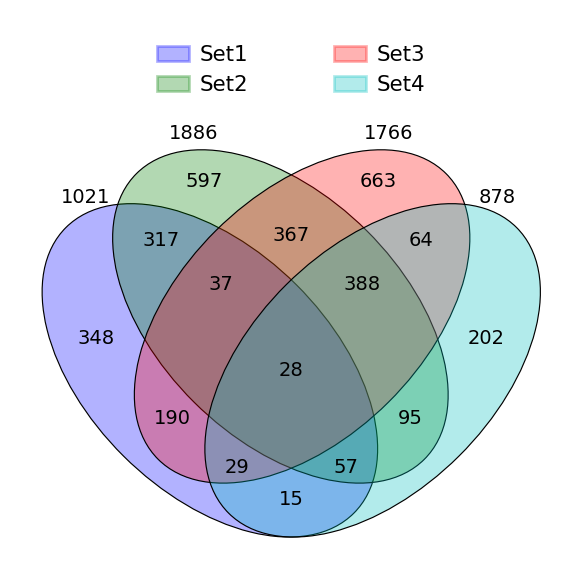

In [ ]:
from venny4py.venny4py import *

#dict of sets
sets = {
    'Set1': set(genes_diff_gs_cin),
    'Set2': set(genes_diff_ebv_cin),
    'Set3': set(genes_diff_ebv_gs),
    'Set4': set(genes_diff_ebv_msi)}
    
venny4py(sets=sets)

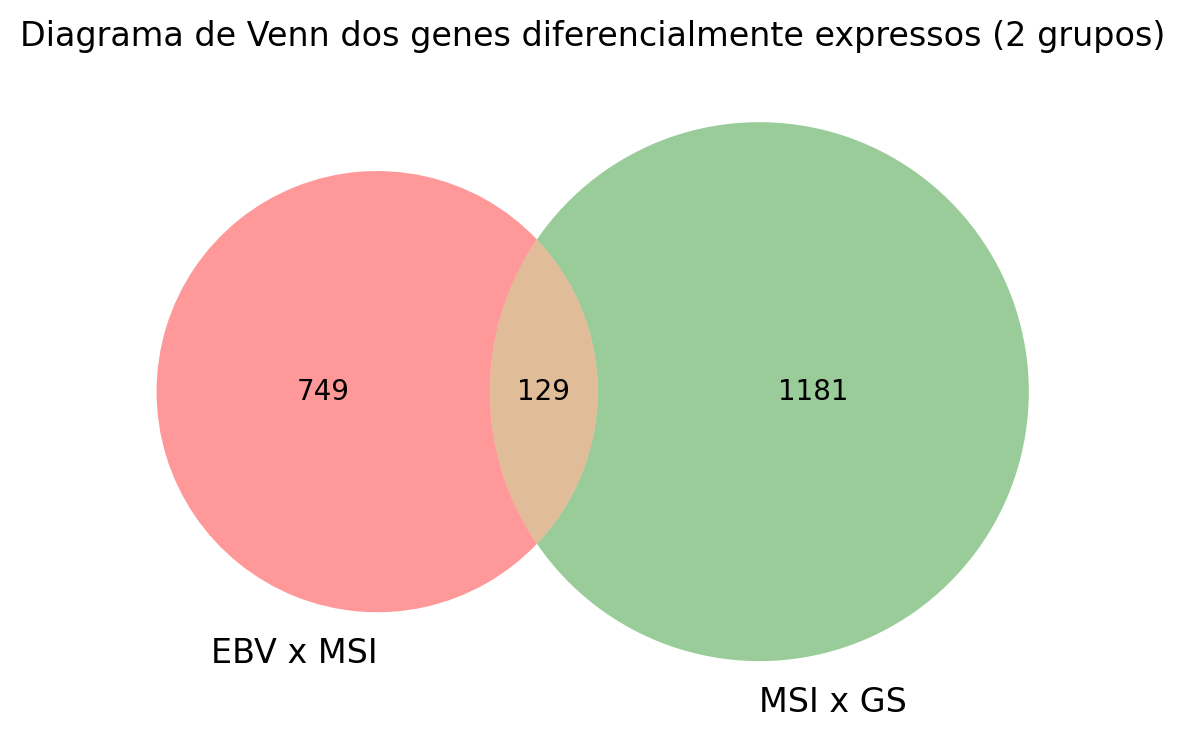

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

venn2(
    [set(genes_diff_ebv_msi), set(genes_diff_msi_gs)],
    set_labels=('EBV x MSI', 'MSI x GS')
)
plt.title('Diagrama de Venn dos genes diferencialmente expressos (2 grupos)')
plt.show()

In [ ]:
len(genes_diff_gs_cin)

36940

## ONE x REST

In [144]:
# ALTERAR NOME DOS SUBTIPOS PARA ABRANGER O REST


meta["EBV_vs_rest"] = meta["subtipo_molecular"].apply(lambda x: "EBV" if x=="EBV" else "Other")

# Rodar DESeq2
dds = DeseqDataSet(
    counts=counts,
    metadata=meta,
    design_factors="EBV_vs_rest"
)
dds.deseq2()

# Extrair estatísticas
stat_res = DeseqStats(dds, contrast=("EBV_vs_rest", "EBV", "Other"))
stat_res.summary()
results = stat_res.results_df

# Critérios clássicos: FDR < 0.05 e |log2FC| > 1
genes_sig = results[(results["padj"] < 0.05) & (results["log2FoldChange"].abs() >= 2)]
genes_EBV = set(genes_sig.index)


/var/folders/mp/b7mgmwh94wjd03gqng1t2xch0000gn/T/ipykernel_74212/1925012324.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.17 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 5.32 seconds.

Fitting dispersion trend curve...
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 5.58 seconds.

Fitting LFCs...
... done in 3.08 seconds.

Calculating cook's distance...
... done in 0.47 seconds.

Replacing 3734 outlier genes.

Fitting dispersions...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 0.56 seconds.

Fitting LFCs...
... done in 0.40 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: EBV_vs_rest EBV vs Other
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398        0.848681  0.211601  4.010771  6.052087e-05   
TNMD             6.047659       -1.440082  0.547120 -2.632116  8.485486e-03   
DPM1          3097.891923        0.187037  0.126460  1.479017  1.391357e-01   
SCYL3         1008.463456       -0.105867  0.096235 -1.100094  2.712913e-01   
FIRRM          601.988359       -0.087068  0.144190 -0.603844  5.459473e-01   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694       -1.625985  0.975092 -1.667521  9.541094e-02   
RNF228          30.820725       -2.528417  0.375482 -6.733791  1.652990e-11   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832        0.340090  0.188814  1.801189  7.167

... done in 1.03 seconds.



In [146]:
len(genes_EBV)

1437

## one vs rest msi

In [152]:
meta["MSI_vs_rest"] = meta["subtipo_molecular"].apply(lambda x: "MSI" if x=="MSI" else "Other")

# Rodar DESeq2
dds = DeseqDataSet(
    counts=counts,
    metadata=meta,
    design_factors="MSI_vs_rest"
)
dds.deseq2()

# Extrair estatísticas
stat_res = DeseqStats(dds, contrast=("MSI_vs_rest", "MSI", "Other"))
stat_res.summary()
results = stat_res.results_df

# Critérios clássicos: FDR < 0.05 e |log2FC| > 1
genes_sig = results[(results["padj"] < 0.05) & (results["log2FoldChange"].abs() >= 2)]
genes_MSI = set(genes_sig.index)

len(genes_MSI)

/var/folders/mp/b7mgmwh94wjd03gqng1t2xch0000gn/T/ipykernel_74212/2167374370.py:4: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.18 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 5.31 seconds.

Fitting dispersion trend curve...
... done in 0.39 seconds.

Fitting MAP dispersions...
... done in 5.48 seconds.

Fitting LFCs...
... done in 2.93 seconds.

Calculating cook's distance...
... done in 0.40 seconds.

Replacing 3872 outlier genes.

Fitting dispersions...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 0.58 seconds.

Fitting LFCs...
... done in 0.42 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: MSI_vs_rest MSI vs Other
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6        2803.709398       -0.544693  0.149733 -3.637773  0.000275   
TNMD             6.213072       -0.654821  0.370310 -1.768305  0.077010   
DPM1          3097.891923       -0.385250  0.086138 -4.472451  0.000008   
SCYL3         1008.463456       -0.254300  0.065805 -3.864435  0.000111   
FIRRM          601.988359       -0.061863  0.100899 -0.613116  0.539800   
...                   ...             ...       ...       ...       ...   
LOC128031834     0.000000             NaN       NaN       NaN       NaN   
LOC124902537     1.751694       -1.107569  0.648778 -1.707160  0.087792   
RNF228          30.820725       -0.727986  0.257590 -2.826143  0.004711   
LOC128031833     0.000000             NaN       NaN       NaN       NaN   
PANO1           27.474832        0.032276  0.132658  0.243301  0.807772   

                  padj  
TSPAN6     

... done in 1.08 seconds.



871

## ONE VS REST GS

In [149]:
meta["GS_vs_rest"] = meta["subtipo_molecular"].apply(lambda x: "GS" if x=="GS" else "Other")

# Rodar DESeq2
dds = DeseqDataSet(
    counts=counts,
    metadata=meta,
    design_factors="GS_vs_rest"
)
dds.deseq2()

# Extrair estatísticas
stat_res = DeseqStats(dds, contrast=("GS_vs_rest", "GS", "Other"))
stat_res.summary()
results = stat_res.results_df

# Critérios clássicos: FDR < 0.05 e |log2FC| > 1
genes_sig = results[(results["padj"] < 0.05) & (results["log2FoldChange"].abs() >= 2)]
genes_GS = set(genes_sig.index)

len(genes_GS)

/var/folders/mp/b7mgmwh94wjd03gqng1t2xch0000gn/T/ipykernel_74212/2877916638.py:4: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.19 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 5.88 seconds.

Fitting dispersion trend curve...
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 5.88 seconds.

Fitting LFCs...
... done in 3.05 seconds.

Calculating cook's distance...
... done in 0.46 seconds.

Replacing 3734 outlier genes.

Fitting dispersions...
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 0.57 seconds.

Fitting LFCs...
... done in 0.40 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: GS_vs_rest GS vs Other
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398       -0.415605  0.156061 -2.663103  7.742379e-03   
TNMD             6.213072        1.706525  0.358811  4.756061  1.974071e-06   
DPM1          3097.891923       -0.580354  0.085844 -6.760567  1.374524e-11   
SCYL3         1008.463456       -0.043703  0.069700 -0.627012  5.306511e-01   
FIRRM          601.988359       -0.797778  0.094747 -8.420038  3.763609e-17   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694       -1.201444  0.678050 -1.771910  7.640956e-02   
RNF228          30.820725        1.823089  0.243152  7.497729  6.493311e-14   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832       -0.141220  0.138153 -1.022203  3.06684

... done in 1.01 seconds.



707

## ONE VS REST CIN

In [150]:
meta["CIN_vs_rest"] = meta["subtipo_molecular"].apply(lambda x: "CIN" if x=="CIN" else "Other")

# Rodar DESeq2
dds = DeseqDataSet(
    counts=counts,
    metadata=meta,
    design_factors="CIN_vs_rest"
)
dds.deseq2()

# Extrair estatísticas
stat_res = DeseqStats(dds, contrast=("CIN_vs_rest", "CIN", "Other"))
stat_res.summary()
results = stat_res.results_df

# Critérios clássicos: FDR < 0.05 e |log2FC| > 1
genes_sig = results[(results["padj"] < 0.05) & (results["log2FoldChange"].abs() >= 2)]
genes_CIN = set(genes_sig.index)

len(genes_CIN)

/var/folders/mp/b7mgmwh94wjd03gqng1t2xch0000gn/T/ipykernel_74212/3968886385.py:4: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.18 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 5.09 seconds.

Fitting dispersion trend curve...
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 5.43 seconds.

Fitting LFCs...
... done in 3.00 seconds.

Calculating cook's distance...
... done in 0.43 seconds.

Replacing 3993 outlier genes.

Fitting dispersions...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 0.60 seconds.

Fitting LFCs...
... done in 0.43 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: CIN_vs_rest CIN vs Other
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6        2803.709398        0.212547  0.124882  1.701987  8.875779e-02   
TNMD             6.213072       -0.897095  0.299631 -2.994000  2.753457e-03   
DPM1          3097.891923        0.503263  0.066814  7.532313  4.984934e-14   
SCYL3         1008.463456        0.225126  0.053818  4.183098  2.875627e-05   
FIRRM          601.988359        0.496833  0.077747  6.390389  1.654646e-10   
...                   ...             ...       ...       ...           ...   
LOC128031834     0.000000             NaN       NaN       NaN           NaN   
LOC124902537     1.751694        1.693292  0.514103  3.293680  9.888499e-04   
RNF228          30.820725       -0.711232  0.209985 -3.387054  7.064750e-04   
LOC128031833     0.000000             NaN       NaN       NaN           NaN   
PANO1           27.474832       -0.057064  0.109405 -0.521580  6.019

... done in 1.12 seconds.



619

In [153]:
# Genes exclusivos de cada subtipo (biomarcadores potenciais)
genes_CIN_unicos = set(genes_CIN) - set(genes_EBV) - set(genes_GS) - set(genes_MSI)
genes_EBV_unicos = set(genes_EBV) - set(genes_CIN) - set(genes_GS) - set(genes_MSI)
genes_GS_unicos = set(genes_GS) - set(genes_CIN) - set(genes_EBV) - set(genes_MSI)
genes_MSI_unicos = set(genes_MSI) - set(genes_CIN) - set(genes_EBV) - set(genes_GS)

print("Genes exclusivos CIN:", len(genes_CIN_unicos))
print("Genes exclusivos EBV:", len(genes_EBV_unicos))
print("Genes exclusivos GS:", len(genes_GS_unicos))
print("Genes exclusivos MSI:", len(genes_MSI_unicos))

Genes exclusivos CIN: 148
Genes exclusivos EBV: 0
Genes exclusivos GS: 359
Genes exclusivos MSI: 0


In [156]:
genes_EBV

{'AARD',
 'ABCA8',
 'ABCA9-AS1',
 'ABCC2',
 'ABCC8',
 'ACMSD',
 'ACP7',
 'ACRP1',
 'ACTG2',
 'ACTN2',
 'ADAMTS19',
 'ADAMTS20',
 'ADARB2-AS1',
 'ADCY5',
 'ADRA1D',
 'AFM',
 'AFP',
 'AGTR2',
 'AHSG',
 'AIRE',
 'AK8',
 'ALB',
 'ALLC',
 'ALX1',
 'ALX3',
 'AMER3',
 'AMHR2',
 'ANKRD1',
 'ANKRD18B',
 'ANKRD20A17P',
 'ANKRD33BP8',
 'ANO3',
 'AP3B2',
 'APOA1',
 'APOA2',
 'APOA4',
 'APOA5',
 'APOB',
 'APOBEC2',
 'APOC3',
 'APOD',
 'APOH',
 'AQP4',
 'ARHGAP40',
 'ASB4',
 'ASCL1',
 'ASIC2',
 'ASTN1',
 'ATP1A2',
 'ATP4A',
 'ATP4B',
 'ATP6V0A4',
 'BAAT',
 'BANF2',
 'BEX1',
 'BMP7',
 'BPIFA1',
 'BPIFA2',
 'BPIFB1',
 'BPIFB2',
 'C12orf56',
 'C1QL2',
 'C1QTNF7',
 'C4BPA',
 'C4BPAP1',
 'C7',
 'C7orf33',
 'C8A',
 'CA4',
 'CA6',
 'CACNA1E',
 'CACNA1I',
 'CACNG4',
 'CACNG6',
 'CADPS',
 'CALCA',
 'CALHM3',
 'CALY',
 'CAMKV',
 'CARD11',
 'CARTPT',
 'CASQ1',
 'CASQ2',
 'CBLIF',
 'CBS',
 'CBY2',
 'CCDC198',
 'CCDC60',
 'CCKBR',
 'CD200R1L',
 'CD8B2',
 'CDH22',
 'CDK5R2',
 'CENPVL3',
 'CES1',
 'CFAP221',
 'CFA

In [159]:
genes_MSI

{'AARD',
 'ABCA8',
 'ABCA9-AS1',
 'ABCC2',
 'ABCC8',
 'ACMSD',
 'ACP7',
 'ACRP1',
 'ACTG2',
 'ACTN2',
 'ADAMTS19',
 'ADAMTS20',
 'ADARB2-AS1',
 'ADCY5',
 'ADRA1D',
 'AFM',
 'AFP',
 'AGTR2',
 'AHSG',
 'AIRE',
 'AK8',
 'ALB',
 'ALLC',
 'ALX1',
 'ALX3',
 'AMER3',
 'AMHR2',
 'ANKRD1',
 'ANKRD18B',
 'ANKRD20A17P',
 'ANKRD33BP8',
 'ANO3',
 'AP3B2',
 'APOA1',
 'APOA2',
 'APOA4',
 'APOA5',
 'APOB',
 'APOBEC2',
 'APOC3',
 'APOD',
 'APOH',
 'AQP4',
 'ARHGAP40',
 'ASB4',
 'ASCL1',
 'ASIC2',
 'ASTN1',
 'ATP1A2',
 'ATP4A',
 'ATP4B',
 'ATP6V0A4',
 'BAAT',
 'BANF2',
 'BEX1',
 'BMP7',
 'BPIFA1',
 'BPIFA2',
 'BPIFB1',
 'BPIFB2',
 'C12orf56',
 'C1QL2',
 'C1QTNF7',
 'C4BPA',
 'C4BPAP1',
 'C7',
 'C7orf33',
 'C8A',
 'CA4',
 'CA6',
 'CACNA1E',
 'CACNA1I',
 'CACNG4',
 'CACNG6',
 'CADPS',
 'CALCA',
 'CALHM3',
 'CALY',
 'CAMKV',
 'CARD11',
 'CARTPT',
 'CASQ1',
 'CASQ2',
 'CBLIF',
 'CBS',
 'CBY2',
 'CCDC198',
 'CCDC60',
 'CCKBR',
 'CD200R1L',
 'CD8B2',
 'CDH22',
 'CDK5R2',
 'CENPVL3',
 'CES1',
 'CFAP221',
 'CFA

In [160]:
genes_comuns = set(genes_CIN) & set(genes_EBV) & set(genes_GS) & set(genes_MSI)
print("Genes presentes em todos os 4 subtipos:", len(genes_comuns))
# Se quiser ver os nomes:
print(list(genes_comuns))

Genes presentes em todos os 4 subtipos: 164
['SLC38A3', 'BPIFA1', 'OR8G3P', 'MYBPHL', 'LRRC52-AS1', 'GCG', 'UPK2', 'LINC02188', 'KRTAP3-1', 'AFP', 'LINC02835', 'PTH2R', 'IGF2BP1', 'PAGE2', 'CLDN6', 'CT45A1', 'C4BPAP1', 'COX7B2', 'LINC01446', 'BANF2', 'NAA11', 'LINC02476', 'FLJ36000', 'FGB', 'LY6K', 'FGF3', 'DEFB126', 'LOC284798', 'LGSN', 'GSTA2', 'LINC02119', 'LOC105374642', 'CTAG1A', 'LOC339166', 'TMEM207', 'ALB', 'LGALS7B', 'ZFP42', 'CYP24A1', 'RNA5SP174', 'RPS3AP23', 'AGTR2', 'IGFL2-AS1', 'LINC01611', 'CFHR4', 'LOC100420424', 'CENPVL3', 'LHX1', 'ORM1', 'VGLL1', 'FAM83C', 'CT45A3', 'ALX3', 'TRIM71', 'PASD1', 'LOC105374511', 'PRSS56', 'LINC00958', 'CT45A5', 'NOTUM', 'KLK5', 'LOC124901168', 'SLC5A12', 'LINC00221', 'LINC01671', 'BPIFB2', 'ORM2', 'APOA5', 'APOH', 'LOC107984132', 'CARTPT', 'H2BW1', 'SERPINA10', 'APOC3', 'CALCA', 'LGALS7', 'UGT2B4', 'PRSS1', 'LINC02999', 'POU4F1', 'LINC01885', 'CPN1', 'CYP4F32P', 'GLDC', 'ZNF716', 'USP24P1', 'SP9', 'TACR3-AS1', 'DLX3', 'OR56A3', 'GABRA3', 